# Hammerstein-Wiener identification example

Resources:

- [What are Hammerstein-Wiener models](https://se.mathworks.com/help/ident/ug/what-are-hammerstein-wiener-models.html)
- [Identifying Hammerstein-Wiener models](https://se.mathworks.com/help/ident/ug/identifying-hammerstein-wiener-models.html)

Block-oriented Nonlinear System Identification (book, chapter 3 is relevante):

https://link.springer.com/book/10.1007/978-1-84996-513-2


One of the examples we are going to follow (trying to translate to Python?):

https://se.mathworks.com/help/ident/ug/two-tank-system-single-input-single-output-nonlinear-arx-and-hammerstein-wiener-models.html


## Example: Two tank-system

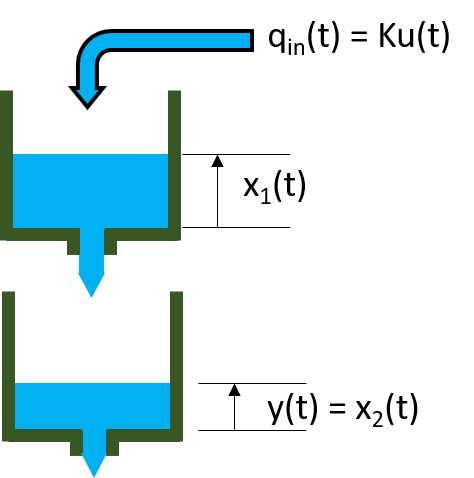

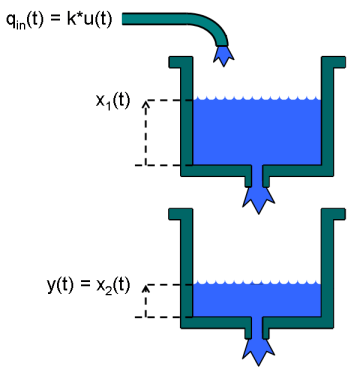

$q_{in} (t) = K u(t)$

Download dependencies:

In [4]:
pip install --upgrade sysidentpy

Note: you may need to restart the kernel to use updated packages.


## Loading data set

The data set was obtained through the System Identification Toolbox from MATLAB.

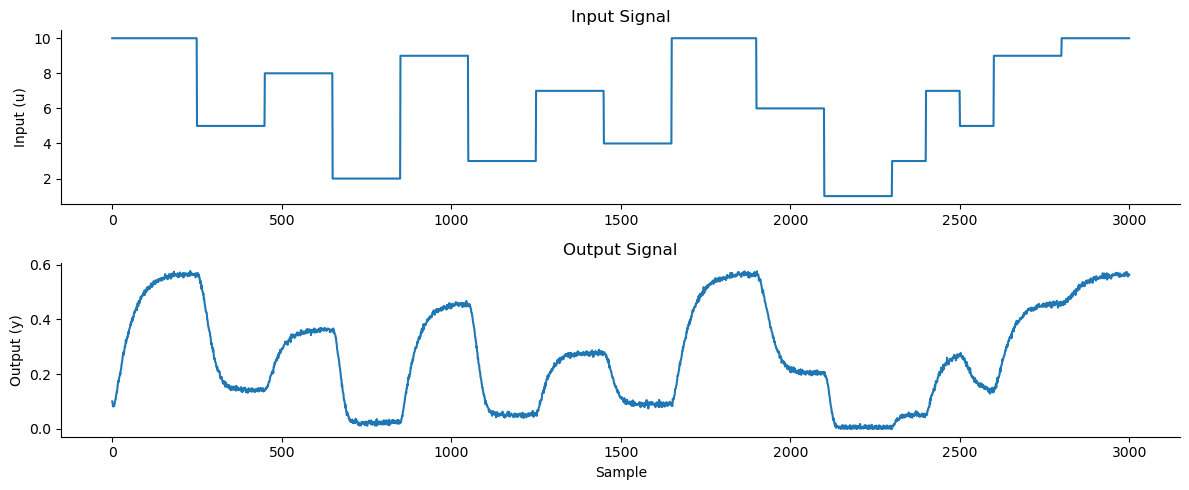

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Replace with your actual folder and file names
folder_name = 'Dataset'
csv_file = 'TwoTankSystemDB.csv'

# Construct the full path to the CSV file
csv_path = os.path.join(folder_name, csv_file)

# Read the CSV file
data = pd.read_csv(csv_path)

# Extract 'Input' and 'Output' columns
u = data['Input'].values
y = data['Output'].values

# Plot the input and output signals
plt.figure(figsize=(12, 5))
plt.subplot(2, 1, 1)
plt.plot(u)
plt.title('Input Signal')
plt.ylabel('Input (u)')
plt.subplot(2, 1, 2)
plt.plot(y)
plt.title('Output Signal')
plt.ylabel('Output (y)')
plt.xlabel('Sample')
plt.tight_layout()
plt.show()

In [9]:
# Split the data into training and validation sets (e.g., 80% train, 20% validation)
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(u, y, test_size=0.2, shuffle=False)

In [10]:
import pandas as pd
import numpy as np

from sysidentpy.model_structure_selection import FROLS
from sysidentpy.basis_function._basis_function import Polynomial
from sysidentpy.parameter_estimation import LeastSquares
from sysidentpy.metrics import root_relative_squared_error
from sysidentpy.utils.generate_data import get_siso_data
from sysidentpy.utils.display_results import results
from sysidentpy.utils.plotting import plot_residues_correlation, plot_results
from sysidentpy.residues.residues_correlation import (
    compute_residues_autocorrelation,
    compute_cross_correlation,
)

# Define the basis function
basis_function = Polynomial(degree=2)

# Define the estimator
estimator = LeastSquares()

# Create the FROLS model
model = FROLS(
    order_selection=True,
    n_info_values=10,  # Adjust as needed
    ylag=2,
    xlag=2,
    info_criteria="aic",
    estimator=estimator,
    err_tol=None,
    basis_function=basis_function,
)

In [11]:
# Fit the model using the training data
model.fit(x_train, y_train)

# Predict on the validation data
yhat = model.predict(x_valid)

# Calculate the Root Relative Squared Error
rrse = root_relative_squared_error(y_valid, yhat)
print(f'Root Relative Squared Error (RRSE): {rrse}')

# Display the model's terms, parameters, and ERR values
r = pd.DataFrame(
    results(
        model.final_model, model.theta, model.err,
        model.n_terms, err_precision=8, dtype='sci'
    ),
    columns=['Regressors', 'Parameters', 'ERR']
)
print(r)


TypeError: FROLS.fit() takes 1 positional argument but 3 were given